# Ejercicio 3 - TP1 Metodos Computaciones
### Camila Cauzzo y Catalina Dolhare

Importamos las clases del archivo de matricesRala para tener acceso a estos metodos 

In [39]:
from matricesRalas import *


Creamos las matrices correspondientes para W y D

In [40]:
W = MatrizRala(11, 11)

''' A = 0
    B = 1
    C = 2
    D = 3
    E = 4
    F = 5
    G = 6
    H = 7
    I = 8
    J = 9
    K = 10
'''

W[1, 0] = 1 #A cita a B
W[5, 0] = 1 #A cita a F
W[6, 0] = 1 #A cita a G
W[0, 2] = 1 #C cita a A
W[0, 3] = 1 #D cita a A
W[0, 4] = 1 #E cita a A
W[8, 5] = 1 #F cita a I
W[5, 6] = 1 #G cita a F
W[6, 7] = 1 #H cita a G
W[6, 8] = 1 #I cita a G
W[7, 8] = 1 #I cita a H
W[9, 8] = 1 #I cita a J
W[4, 10] = 1 #K cita a E

D = MatrizRala(11, 11)
D[0, 0] = 1/3
D[2, 2] = 1
D[3, 3] = 1
D[4, 4] = 1
D[5, 5] = 1
D[6, 6] = 1
D[7, 7] = 1
D[8, 8] = 1/3
D[10, 10] = 1

Si el sistema converge, encontramos el vector de probabilidad p* tal que:

$p^* = \frac{1-d}{N}*\mathbf{1} + dWDp^*$, con d = 0,85

Para expresar la solución como sistema lineal Ax=b,

$p^* = \frac{1-d}{N}*\mathbf{1} + dWDp^*$

$p^* - dWDp^* = \frac{1-d}{N}*\mathbf{1}$

$(\mathbf{I} - dWD) p^*= \frac{1-d}{N}*\mathbf{1}$

Entonces,

$A = (\mathbf{I} - dWD)$

$x = p^*$

$b = \frac{1-d}{N}*\mathbf{1}$

Utilizando gauss jordan obtendremos el vector de probabilidades $p^*$

In [41]:
Identidad = MatrizRala(11, 11)
for i in range(11):
    Identidad[i, i] = 1

WD = W @ D
dWD = WD * 0.85
A = Identidad - dWD

b = MatrizRala(11, 1)
vector_unos = MatrizRala(11, 1)

for i in range(11):
    vector_unos[i, 0] = 1
    
for i in range(11):
    b[i, 0] = ((1 - 0.85)/11) * vector_unos[i, 0]

x = MatrizRala(11, 1)
x = GaussJordan(A, b)
x


MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892243 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])

Para comparar este resultado con el metodo iterativo,  inicializamos el vector $p_0$ con una distribucion equiprobable

In [42]:
p0 = MatrizRala(11, 1)
for i in range(11):
    p0[i, 0] = 1/11

Para cada t, calculamos la probabilidad hasta que converga:

$p_{t+1} = \frac{1-d}{N}*\mathbf{1} + dWDp_t$, con d = 0,85

La probabilidad va a converge cuando la diferencia entre la probabilidad y la anterior sea menor a un epsilon.

In [53]:
p = [p0]

dif = 1
epsilon = 1e-6

j:int=1

while dif > epsilon:
    dif = 0
    p.append(b + (0.85 * ((W@D) @ p[-1])))
    for i in range(p[-1].shape[0]):
        dif += abs((p[-1][i, 0] - p[-2][i, 0]))
    j = j + 1

print(j)

print(p[-1]) #probabilidades cuando t converge
print(x)


43
MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539584606579674 ]
    [ 0.10029636660402777 ]
    [ 0.04529129370635331 ]
    [ 0.11172302950797616 ]
    [ 0.04529129370635331 ]
    [ 0.01363636363636364 ]
])
MatrizRala([ 
    [ 0.058261363636363646 ]
    [ 0.030143750000000004 ]
    [ 0.01363636363636364 ]
    [ 0.01363636363636364 ]
    [ 0.02522727272727273 ]
    [ 0.11539510774418678 ]
    [ 0.10029571499316091 ]
    [ 0.04529098844839165 ]
    [ 0.11172220521892243 ]
    [ 0.04529098844839165 ]
    [ 0.01363636363636364 ]
])


Calculamos la diferencia absoluta entre $p_t$ y $p^*$ para cada valor de t

In [48]:
diferencias = []

for i in range(len(p)):
    diferencia = 0
    for j in range(p[i].shape[0]):
        diferencia += abs(p[i][j, 0] - x[j,0])
    diferencias.append(diferencia)

print(diferencias)

[0.5368350283322141, 0.3381324881662368, 0.252718380758695, 0.15469079060149202, 0.11778125777320923, 0.08192628302573449, 0.05906873662421935, 0.04827489526794829, 0.037265177084551834, 0.026347206552683675, 0.020160356584625075, 0.016028424641671632, 0.011877711189886578, 0.008711461826024933, 0.006789096140823195, 0.005220445741698568, 0.003850055323574436, 0.002905597062434817, 0.002249985619493744, 0.001696506843514231, 0.0012647175792398074, 0.0009661707483813869, 0.00073879127368634, 0.0005540939529442845, 0.0004178466972325906, 0.00031935245339163865, 0.00024197887038721055, 0.00018195020315402155, 0.0001380803043121298, 0.00010510308346659003, 7.935155040732222e-05, 5.9925903373614364e-05, 4.5541737662246895e-05, 3.45320791192566e-05, 2.607466688972493e-05, 1.9750005246607638e-05, 1.4993361594911603e-05, 1.1346355309804768e-05, 8.580037018382503e-06, 6.505808121906598e-06, 4.931569638530475e-06, 3.7306945400855662e-06, 2.8247374538881154e-06]


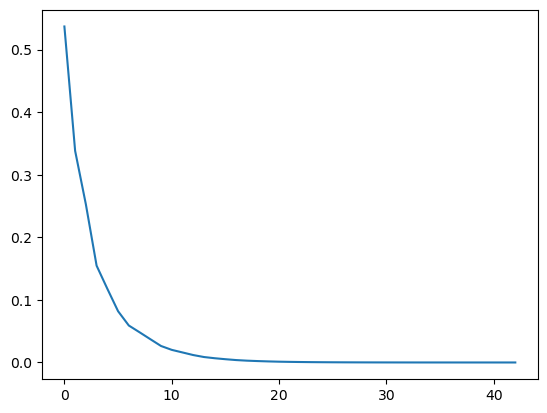

In [45]:
import matplotlib.pyplot as plt
plt.plot(diferencias)

plt.show()

Comparando los resultados obtenido con el metodo iterativo con el obtenido con Gauss Jordan, notamos que a partir de t=11 aproximadamente las diferencias de probabilidades son casi nulas. PORQUE